# Load Packages

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load training.csv and validation.csv files

In [29]:
validation = pd.read_csv("../Data/solution/validation_full_with_predictions.csv", sep="\t")   
training = pd.read_csv("../Data/processed/training_full.csv", sep="\t")


# Training info

print(training.columns.tolist())
print("Shape:", training.shape)
print(training.info())
training.describe(include='all')

# Validation info

In [30]:
print(validation.columns.tolist())
print("Shape:", validation.shape)
print(validation.info())
validation.describe(include='all')

['ActualFlightTime', 'ActualTotalFuel', 'FlownPassengers', 'BagsCount', 'FlightBagsWeight', 'ActualTOW']
Shape: (1878, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ActualFlightTime  1878 non-null   float64
 1   ActualTotalFuel   1878 non-null   float64
 2   FlownPassengers   1878 non-null   float64
 3   BagsCount         1878 non-null   float64
 4   FlightBagsWeight  1878 non-null   float64
 5   ActualTOW         1878 non-null   float64
dtypes: float64(6)
memory usage: 88.2 KB
None


,ActualFlightTime,ActualTotalFuel,FlownPassengers,BagsCount,FlightBagsWeight,ActualTOW
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,110.446219,4709.011715,165.990628,36.737913,457.533333,64757.341936
std,51.150847,2071.596772,26.446580,23.750328,279.669151,3074.842772
min,7.000000,1100.000000,6.000000,2.000000,20.000000,52070.125741
25%,72.000000,3200.000000,163.000000,20.000000,250.000000,63217.031986
50%,104.000000,4420.500000,174.000000,31.000000,390.000000,64834.472901
75%,140.000000,5895.500000,180.000000,48.000000,600.000000,66630.563525
max,318.000000,13040.000000,189.000000,260.000000,1700.000000,74037.091583


# Histograms

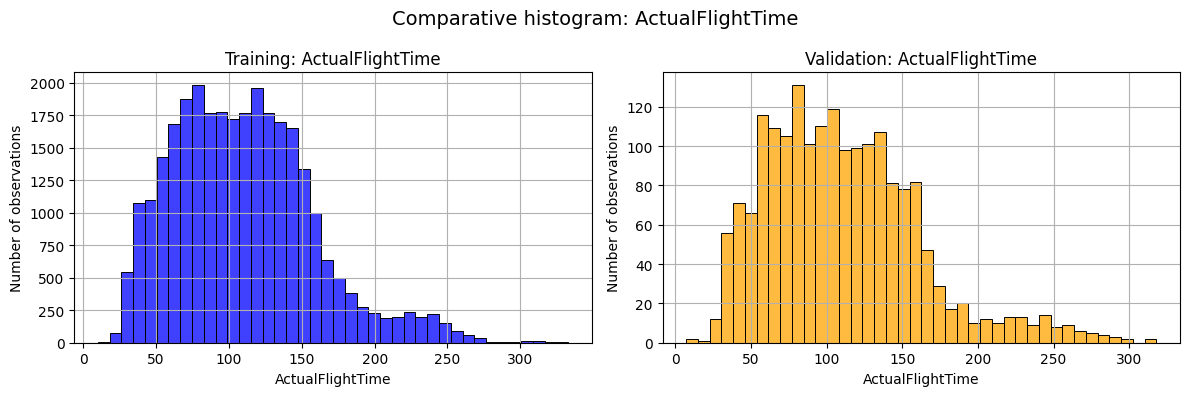

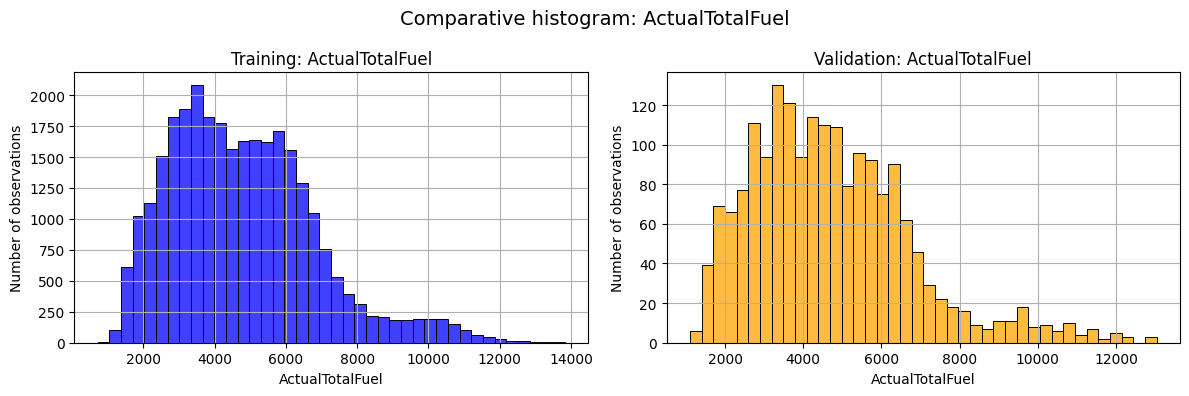

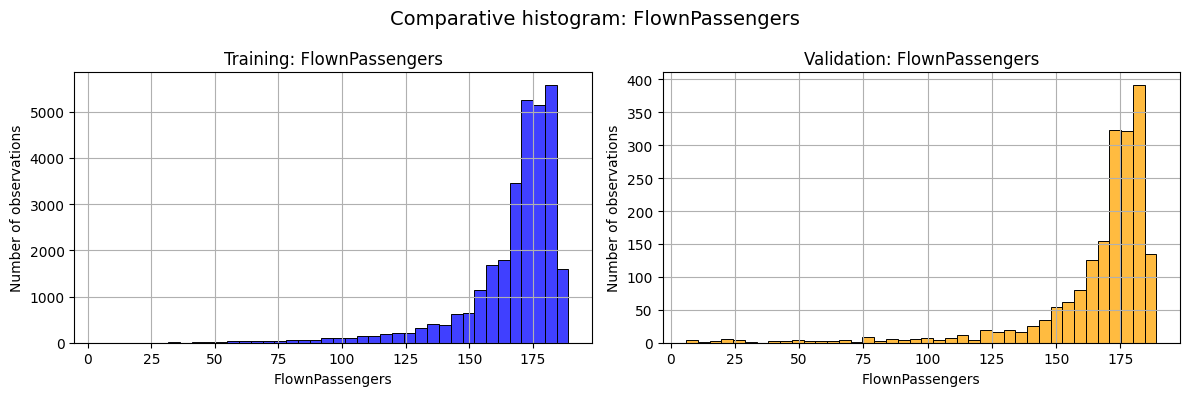

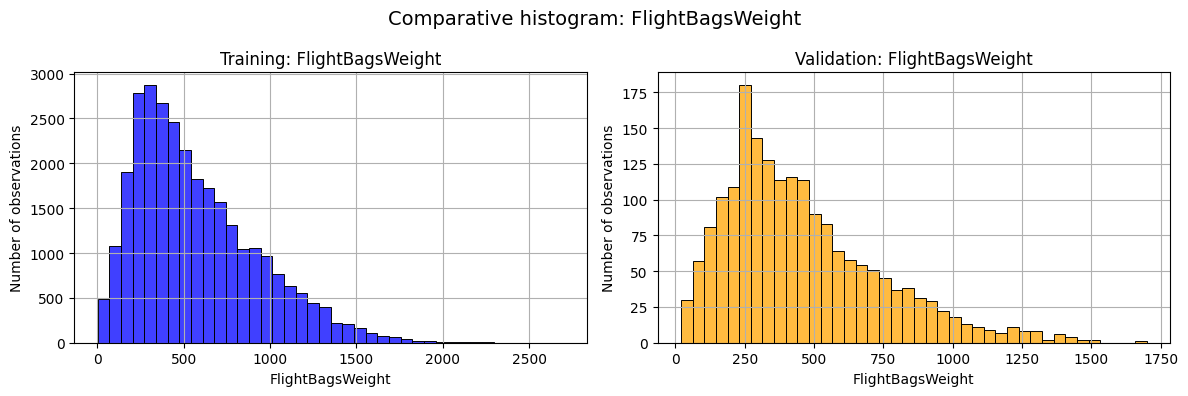

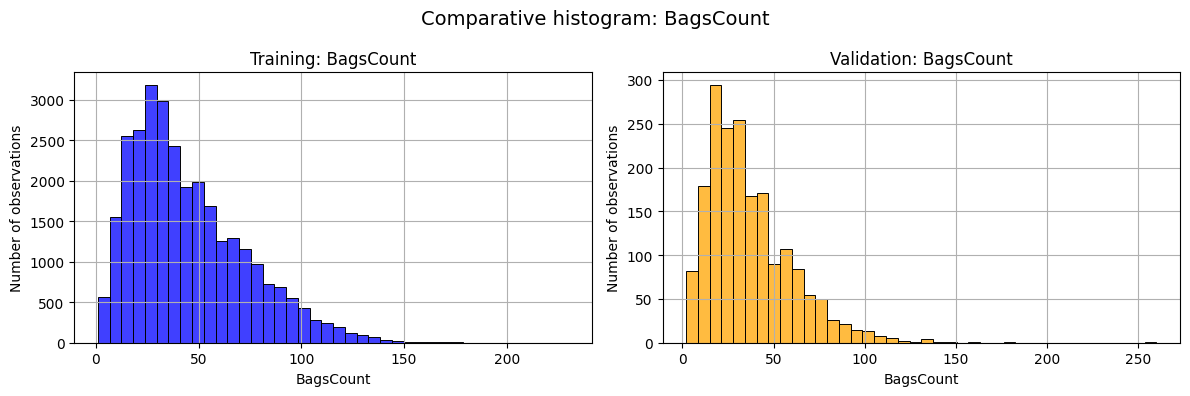

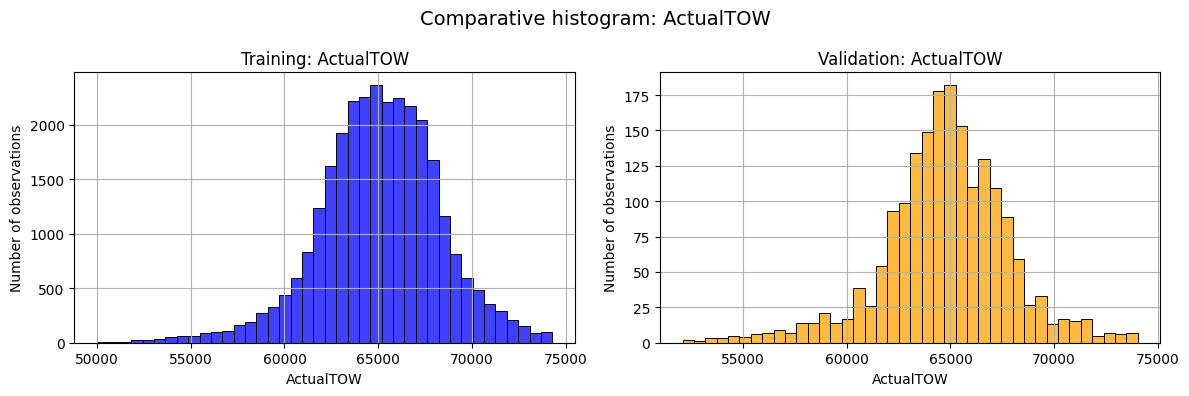

In [31]:
def plot_comparative_histograms(train_df, val_df, columns, bins=40):
    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        sns.histplot(train_df[col], bins=bins, ax=axes[0], kde=False, color='blue')
        axes[0].set_title(f"Training: {col}")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Number of observations")
        axes[0].grid(True)

        sns.histplot(val_df[col], bins=bins, ax=axes[1], kde=False, color='orange')
        axes[1].set_title(f"Validation: {col}")
        axes[1].set_xlabel(col)
        axes[1].set_ylabel("Number of observations")
        axes[1].grid(True)

        fig.suptitle(f"Comparative histogram: {col}", fontsize=14)
        plt.tight_layout()
        plt.show()

columns_to_plot = [
    'ActualFlightTime',
    'ActualTotalFuel',
    'FlownPassengers',
    'FlightBagsWeight',
    'BagsCount',
    'ActualTOW',
]

plot_comparative_histograms(training, validation, columns_to_plot)




# Scatter Plots

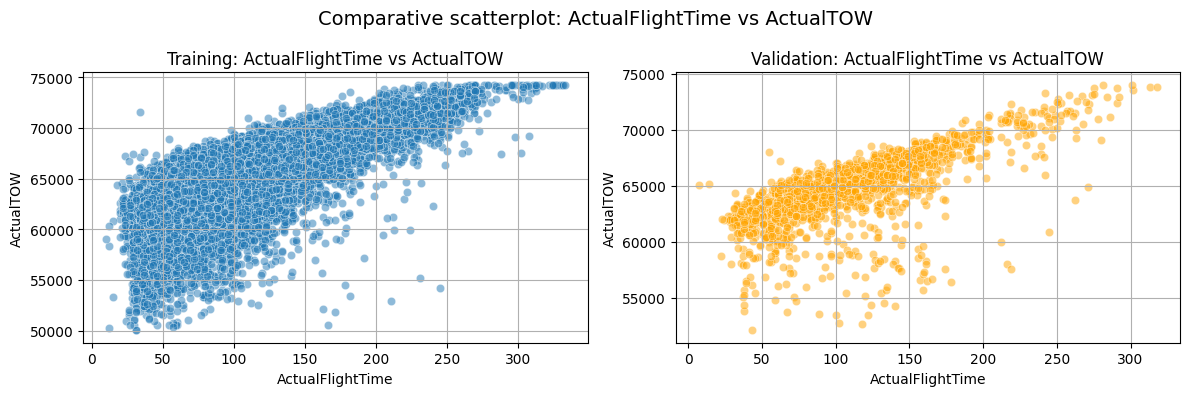

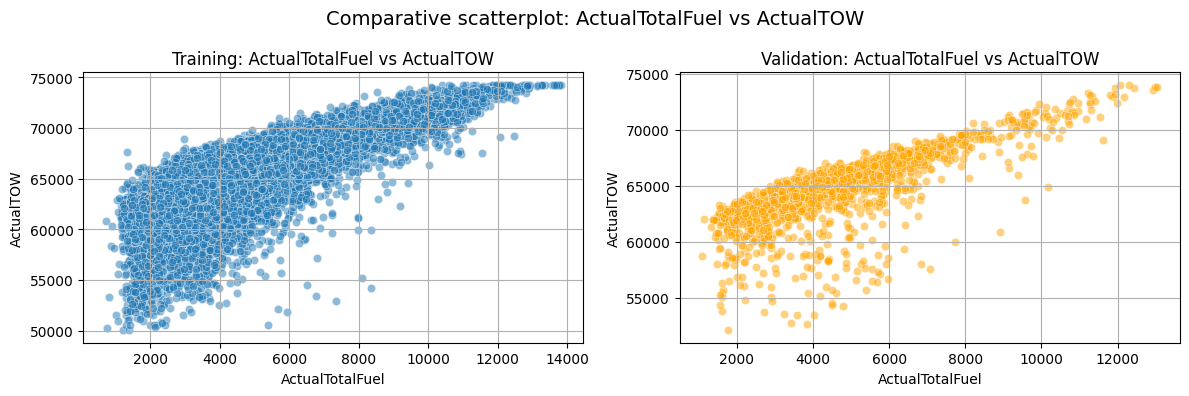

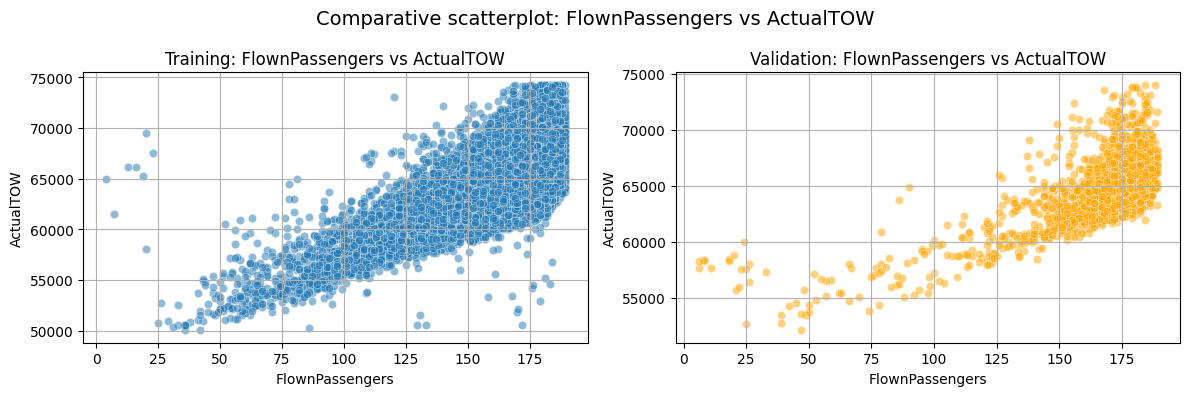

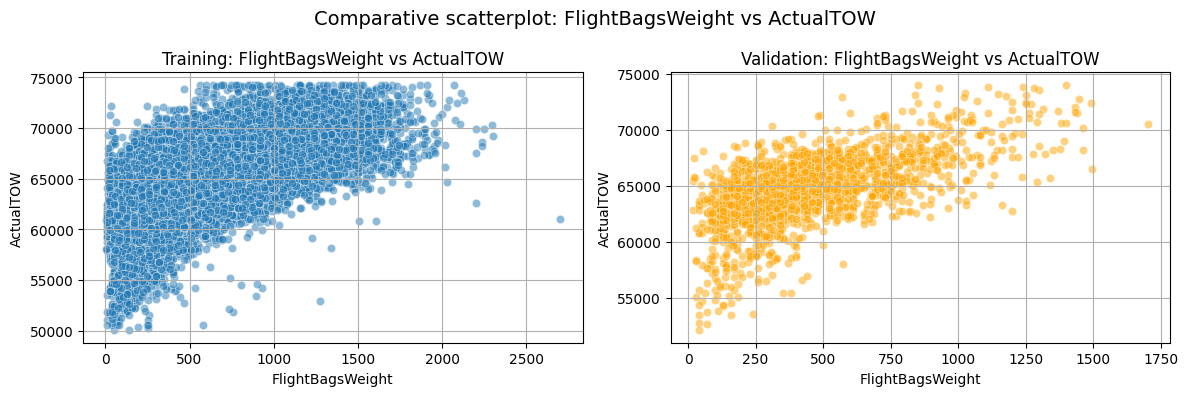

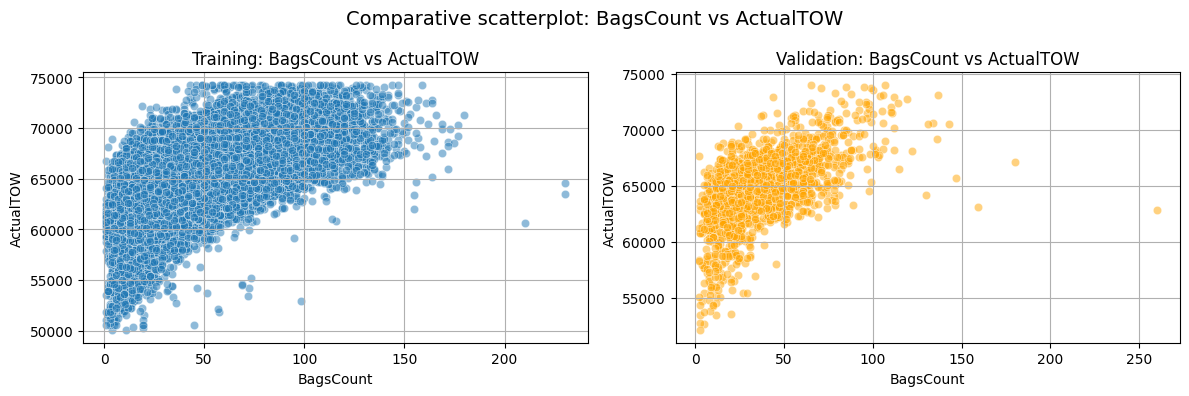

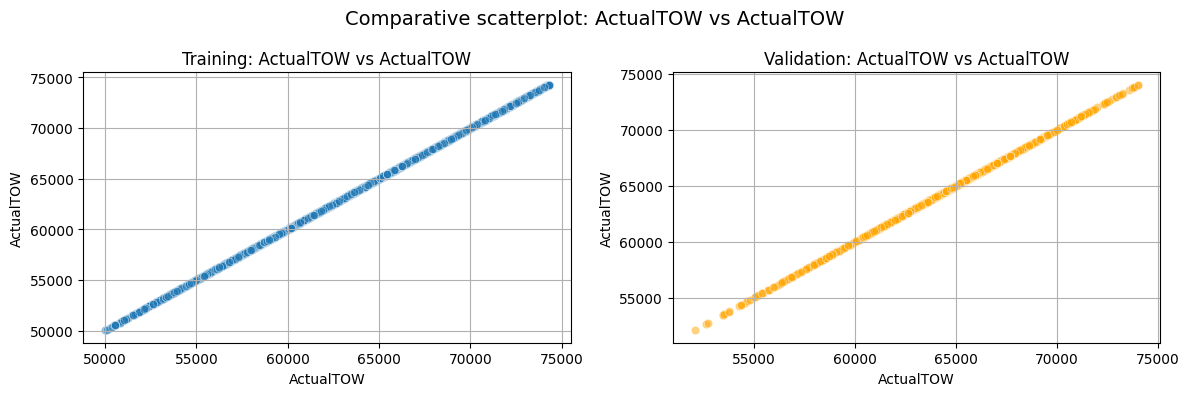

In [32]:


def plot_comparative_scatterplots(train_df, val_df, columns, target='ActualTOW'):
    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        sns.scatterplot(x=train_df[col], y=train_df[target], ax=axes[0], alpha=0.5)
        axes[0].set_title(f"Training: {col} vs {target}")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel(target)
        axes[0].grid(True)

        sns.scatterplot(x=val_df[col], y=val_df[target], ax=axes[1], alpha=0.5, color='orange')
        axes[1].set_title(f"Validation: {col} vs {target}")
        axes[1].set_xlabel(col)
        axes[1].set_ylabel(target)
        axes[1].grid(True)

        fig.suptitle(f"Comparative scatterplot: {col} vs {target}", fontsize=14)
        plt.tight_layout()
        plt.show()

plot_comparative_scatterplots(training, validation, columns_to_plot, target='ActualTOW')


# Box Plots

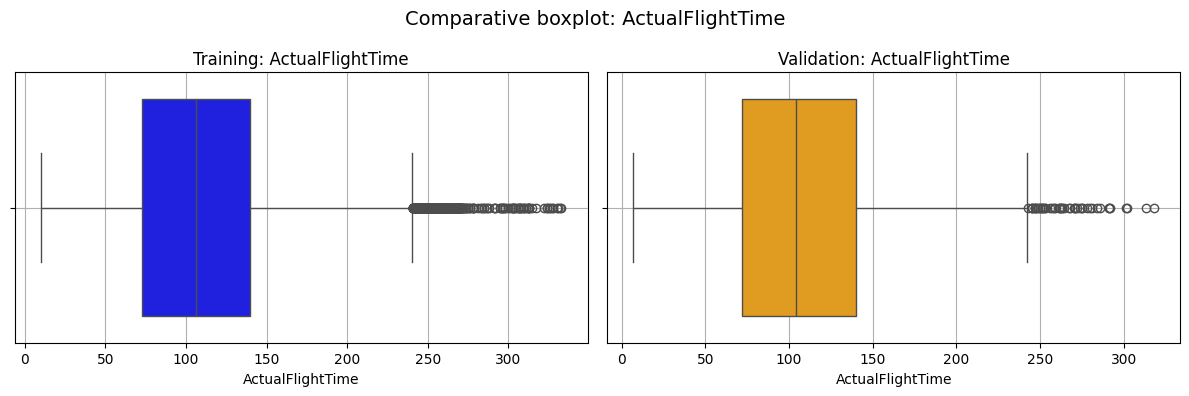

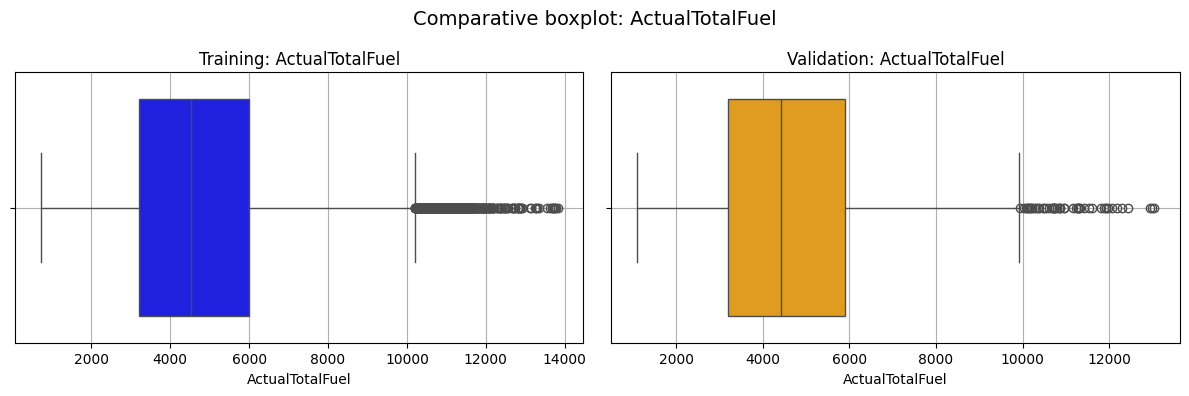

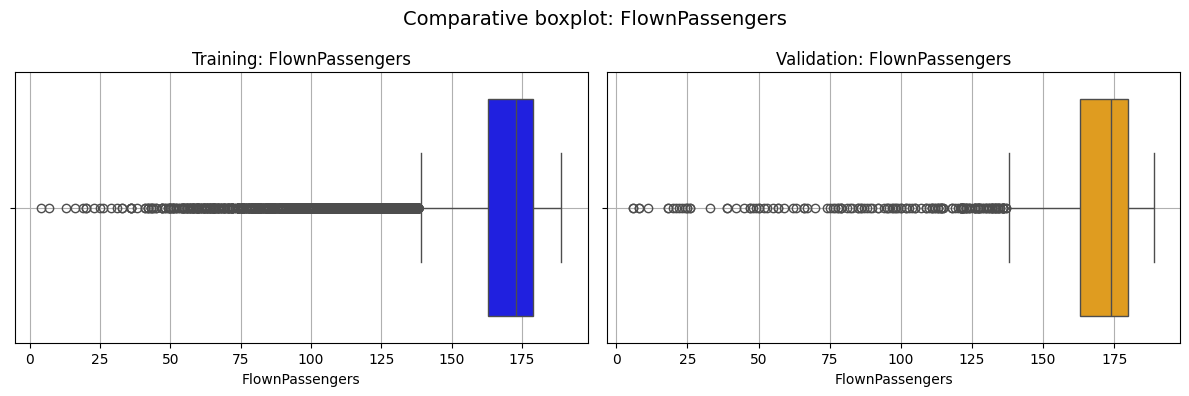

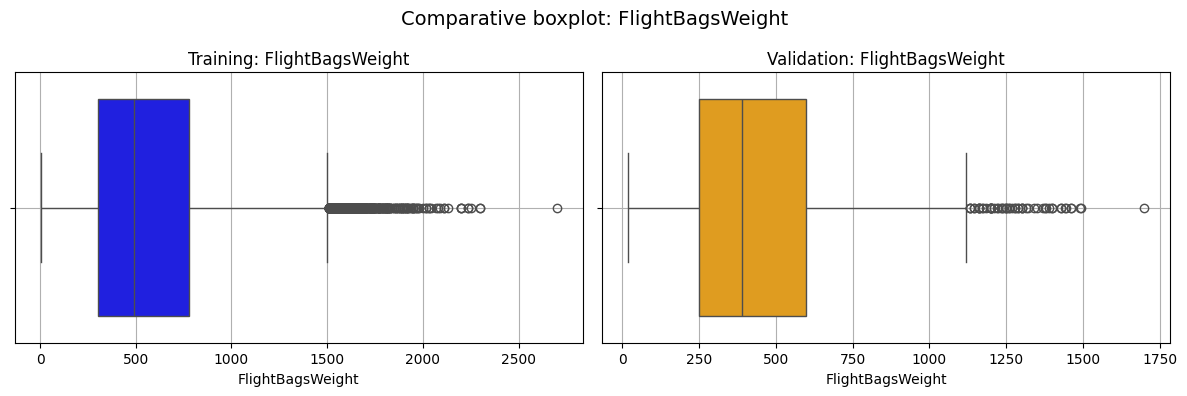

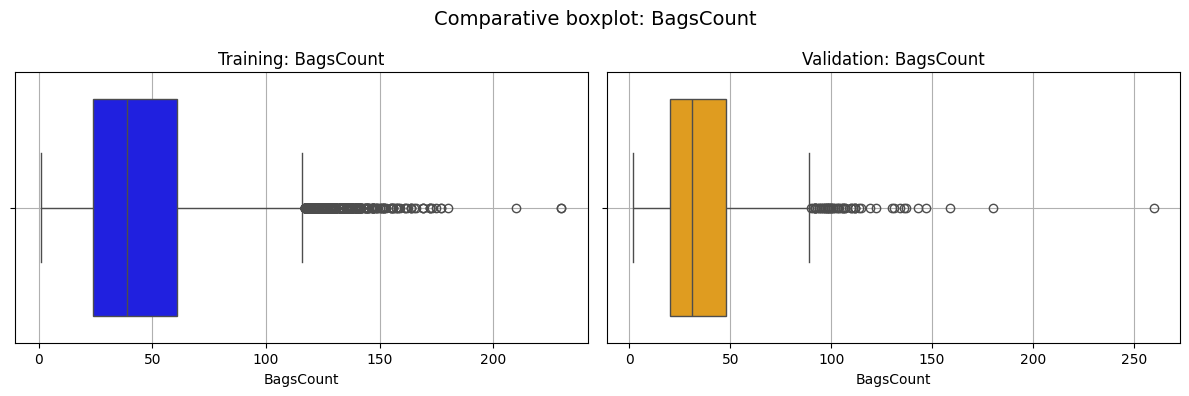

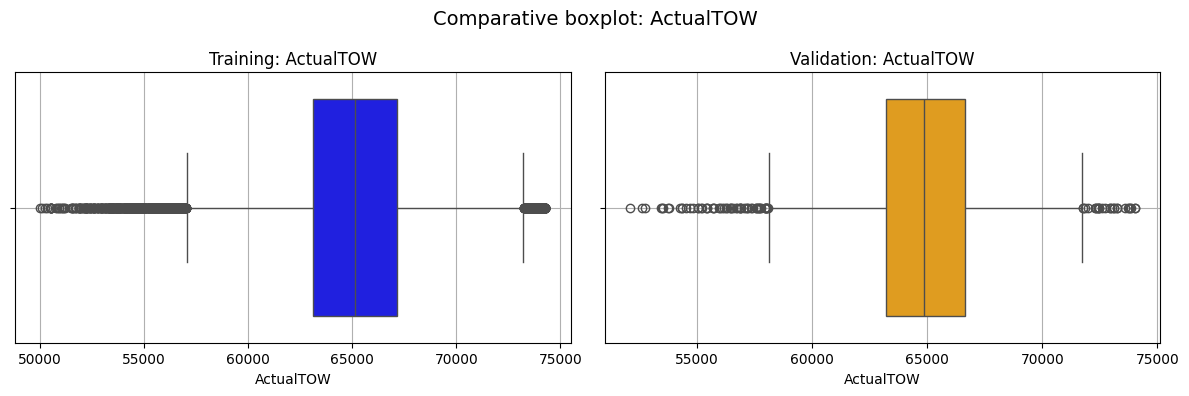

In [33]:
def plot_comparative_boxplots(train_df, val_df, columns):
    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        sns.boxplot(x=train_df[col], ax=axes[0], orient="h", color="blue")
        axes[0].set_title(f"Training: {col}")
        axes[0].set_xlabel(col)
        axes[0].grid(True)

        sns.boxplot(x=val_df[col], ax=axes[1], orient="h", color="orange")
        axes[1].set_title(f"Validation: {col}")
        axes[1].set_xlabel(col)
        axes[1].grid(True)

        fig.suptitle(f"Comparative boxplot: {col}", fontsize=14)
        plt.tight_layout()
        plt.show()

plot_comparative_boxplots(training, validation, columns_to_plot)




# Training data heatmap

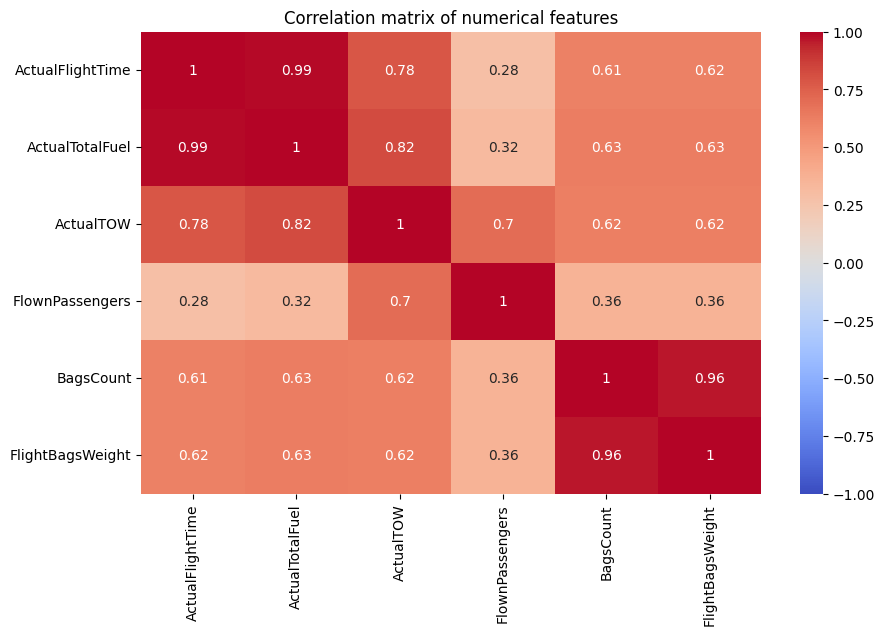

In [34]:
corr = training.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title("Correlation matrix of numerical features")
plt.show()

# Validation data heatmap

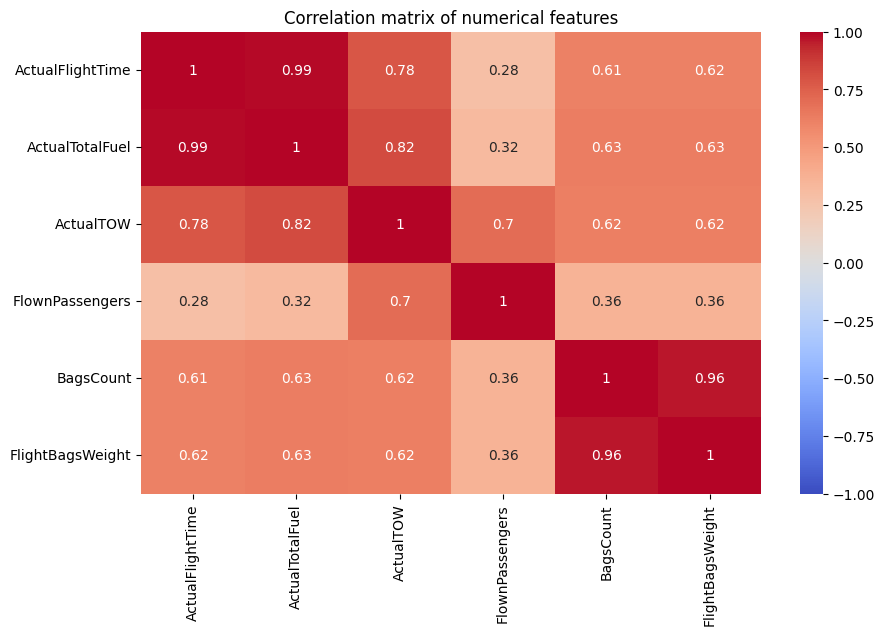

In [35]:
corr = training.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title("Correlation matrix of numerical features")
plt.show()